In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
pretty_agg_names = {
    'fedavg': 'FedAvg',
    'rfa_whole': 'RFA Whole',
    'rfa_component': 'RFA Component',
    'random_sample_simple_0_3': 'Simple Random Sample p = 0.3',
    'random_sample_simple_0_5': 'Simple Random Sample p = 0.5',
    'random_sample_simple_0_7': 'Simple Random Sample p = 0.7',
    'clusteragg_kmeans_average_3': 'ClusterAgg KMeans K = 3',
    'clusteragg_kmeans_average_5': 'ClusterAgg KMeans K = 5',
    'clusteragg_kmeans_average_8': 'ClusterAgg KMeans K = 8',
    # 'clusteragg_kmeans_median_3': 'ClusterAgg KMeans K = 3',
    # 'clusteragg_kmeans_median_5': 'ClusterAgg KMeans K = 5',
    # 'clusteragg_kmeans_median_8': 'ClusterAgg KMeans K = 8',
    # 'clusteragg_agglo_average': 'ClusterAgg Agglo Average',
    # 'clusteragg_agglo_median': 'ClusterAgg Agglo Median',
    'clusteragg_meanshift_average': 'ClusterAgg MeanShift Average',
    'clusteragg_meanshift_median': 'ClusterAgg MeanShift Median',
}

pretty_client_names = {
        'no_poison_no_straggle': 'No Poison / No Straggle',
        'yes_poison_no_straggle': 'Yes Poison / No Straggle',
        'no_poison_yes_straggle': 'No Poison / Yes Straggle',
        'yes_poison_yes_straggle': 'Yes Poison / Yes Straggle',
    }

def get_result(agg_type = 'fedavg', task_type = 'mnist_0_1'):
    # settings = 

    result_df = pd.concat([
        pd.read_csv(
            f'../output/{agg_type}/{task_type}/{s}/report.csv'
        ).assign(**{
            "Client Type": s_type,
            "Aggregator Type": pretty_agg_names[agg_type]
        })
        for s,s_type in pretty_client_names.items()
    ]).rename(
        columns = dict(
            accuracy_score = 'Accuracy Score',
            round = 'Round',
            queue_size = '# Withheld Updates',
            aggregator_time = 'Aggregator Runtime',
            client_train_acc_avg = 'Client Training Accuracy',
            client_test_acc_avg = 'Client Test Accuracy'
        )
    )

    return result_df


all_results = pd.concat([get_result(agg_type) for agg_type in pretty_agg_names])


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


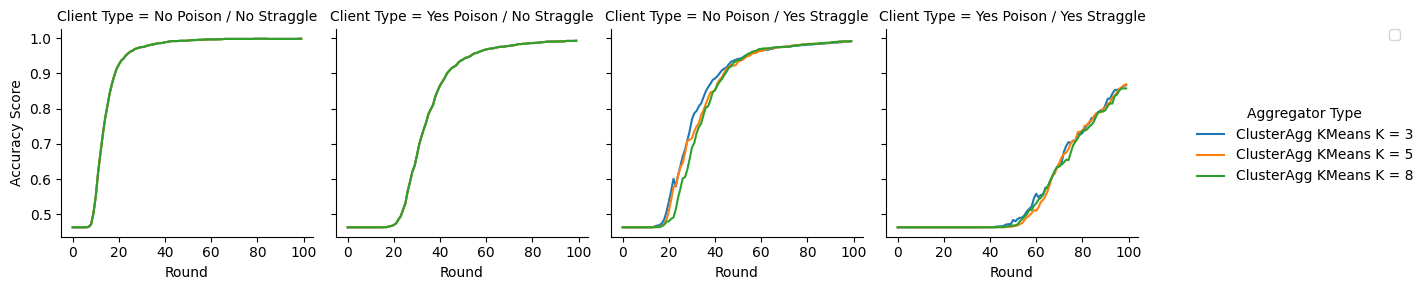

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


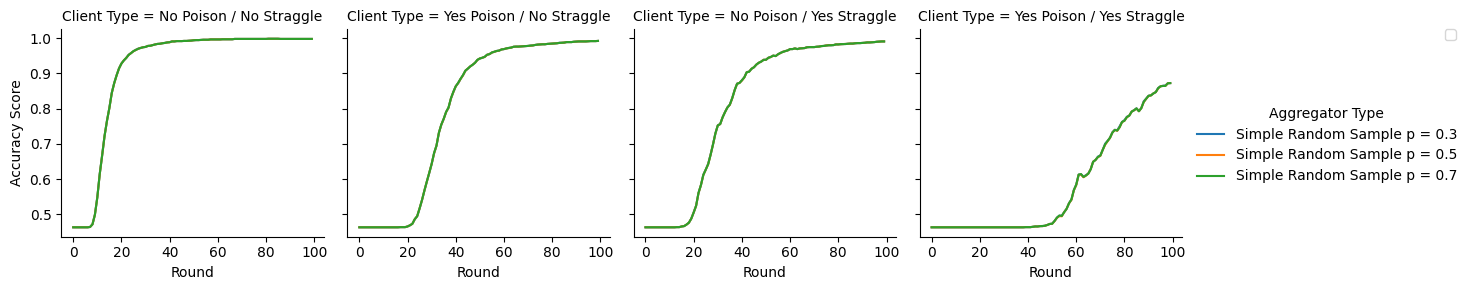

In [6]:
grid = sns.relplot(
    data=all_results[all_results['Aggregator Type'].str.contains('KMeans')],
    x = "Round", 
    y = "Accuracy Score", 
    hue = "Aggregator Type", 
    col="Client Type", 
    kind="line",
    height=3,
    aspect = 1, 
    # ax = ax
).set(
    
)
plt.legend(bbox_to_anchor=(2, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()


grid = sns.relplot(
    data=all_results[all_results['Aggregator Type'].str.contains('Random Sample')],
    x = "Round", 
    y = "Accuracy Score", 
    hue = "Aggregator Type", 
    col="Client Type", 
    kind="line",
    height=3,
    aspect = 1, 
    # ax = ax
).set(
    
)
plt.legend(bbox_to_anchor=(2, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()




In [40]:
plt.

AttributeError: 'function' object has no attribute 'get_texts'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


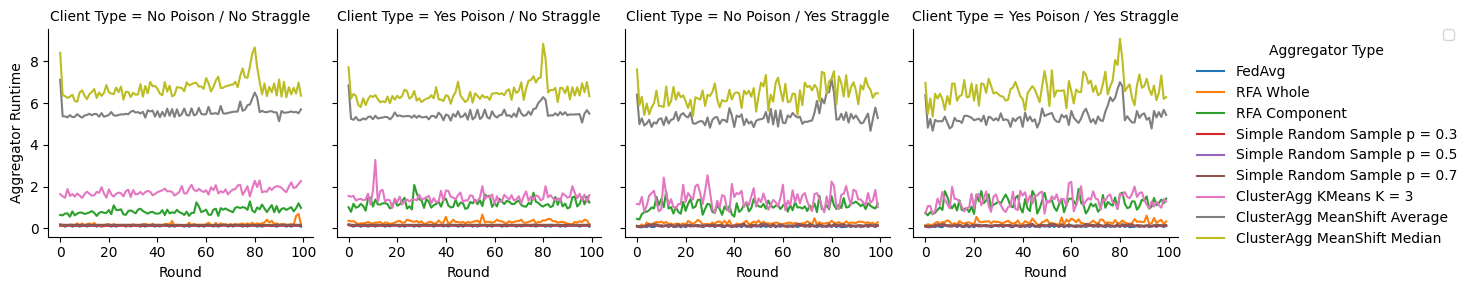

In [37]:

# fig,ax = plt.subplots()
grid = sns.relplot(
    data=all_results,
    x = "Round", 
    y = "Aggregator Runtime", 
    hue = "Aggregator Type", 
    col="Client Type", 
    kind="line",
    height=3,
    aspect = 1, 
    # ax = ax
)
plt.legend(bbox_to_anchor=(2, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


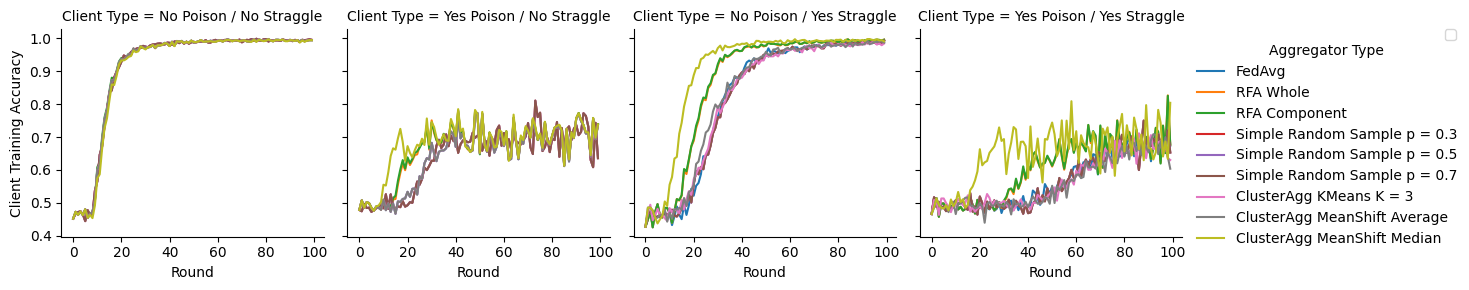

In [39]:

# fig,ax = plt.subplots()
grid = sns.relplot(
    data=all_results,
    x = "Round", 
    y = "Client Training Accuracy", 
    hue = "Aggregator Type", 
    col="Client Type", 
    kind="line",
    height=3,
    aspect = 1, 
    # ax = ax
)
plt.legend(bbox_to_anchor=(2, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()

In [ ]:

# fig,ax = plt.subplots()
grid = sns.relplot(
    data=all_results,
    x = "Round", 
    y = "Client Testing Accuracy", 
    hue = "Aggregator Type", 
    col="Client Type", 
    kind="line",
    height=3,
    aspect = 1, 
    # ax = ax
)
plt.legend(bbox_to_anchor=(2, 1), loc='upper left', borderaxespad=0)

plt.tight_layout()

In [36]:
all_results.columns

Index(['Round', 'client_req', 'new_updates', 'avg_loss', '# Withheld Updates',
       'client_train_acc', 'client_test_acc', 'client_train_acc_avg',
       'client_test_acc_avg', 'benign_client_train_acc_avg',
       'benign_client_test_acc_avg', 'malicious_client_train_acc_avg',
       'malicious_client_test_acc_avg', 'Accuracy Score', 'Aggregator Runtime',
       'Client Type', 'Aggregator Type'],
      dtype='object')

In [ ]:
plt.get_